In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [30]:
df = pd.read_csv("Meteorite_Landings.csv")
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [31]:
df.dtypes

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

In [32]:
df.isnull().sum()
df.shape

(45716, 10)

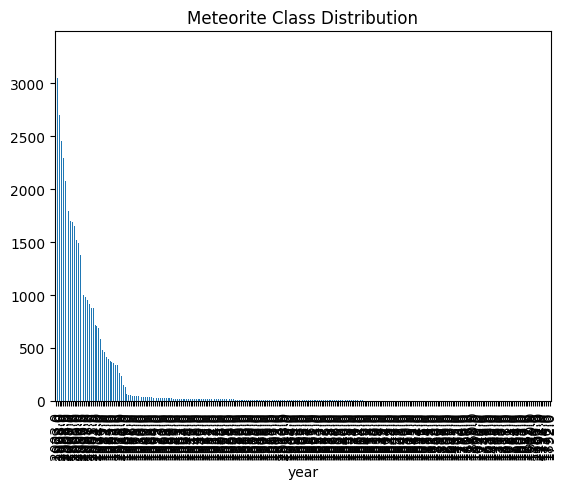

In [33]:
df['year'].value_counts().plot(kind='bar')
plt.title('Meteorite Class Distribution')
plt.show()

In [34]:
df = df.dropna(subset=["mass (g)","reclat","reclong","GeoLocation"])
df.shape

(38282, 10)

In [38]:
df = df[df['year'].notnull()]
df = df[df['year'] > 1000]  # Filter out bad values like 0.0
df['year'] = df['year'].astype(int)
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,age
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",145
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",74
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",73
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",49
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",123


In [37]:
df["age"] = 2025 - df["year"]
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,age
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",145
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",74
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",73
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",49
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",123


In [39]:
print(df['year'].describe())
print(df['year'].value_counts().sort_index())

count    38114.000000
mean      1990.023561
std         24.803808
min       1399.000000
25%       1986.000000
50%       1996.000000
75%       2002.000000
max       2101.000000
Name: year, dtype: float64
year
1399       1
1490       1
1491       1
1575       1
1583       1
        ... 
2010    1005
2011     713
2012     234
2013      11
2101       1
Name: count, Length: 252, dtype: int64


In [41]:
df['log_mass'] = np.log1p(df['mass (g)'])
df["fall"] = df["fall"].map({"Fell": 1, "Found": 0})
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,age,log_mass
0,Aachen,1,Valid,L5,21.0,1,1880,50.77500,6.08333,"(50.775, 6.08333)",145,3.091042
1,Aarhus,2,Valid,H6,720.0,1,1951,56.18333,10.23333,"(56.18333, 10.23333)",74,6.580639
2,Abee,6,Valid,EH4,107000.0,1,1952,54.21667,-113.00000,"(54.21667, -113.0)",73,11.580593
3,Acapulco,10,Valid,Acapulcoite,1914.0,1,1976,16.88333,-99.90000,"(16.88333, -99.9)",49,7.557473
4,Achiras,370,Valid,L6,780.0,1,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",123,6.660575


In [43]:
features = df[['log_mass', 'age', 'reclat', 'reclong', 'fall']]

In [45]:
from sklearn.ensemble import IsolationForest

In [46]:
model = IsolationForest(contamination=0.01, random_state=42)
df["anomaly"] = model.fit_predict(features)

In [47]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,age,log_mass,anomaly
0,Aachen,1,Valid,L5,21.0,1,1880,50.77500,6.08333,"(50.775, 6.08333)",145,3.091042,-1
1,Aarhus,2,Valid,H6,720.0,1,1951,56.18333,10.23333,"(56.18333, 10.23333)",74,6.580639,1
2,Abee,6,Valid,EH4,107000.0,1,1952,54.21667,-113.00000,"(54.21667, -113.0)",73,11.580593,1
3,Acapulco,10,Valid,Acapulcoite,1914.0,1,1976,16.88333,-99.90000,"(16.88333, -99.9)",49,7.557473,1
4,Achiras,370,Valid,L6,780.0,1,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",123,6.660575,-1


In [48]:
df["anomaly"] = df["anomaly"].map({1: 0, -1: 1}) 

In [49]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,age,log_mass,anomaly
0,Aachen,1,Valid,L5,21.0,1,1880,50.77500,6.08333,"(50.775, 6.08333)",145,3.091042,1
1,Aarhus,2,Valid,H6,720.0,1,1951,56.18333,10.23333,"(56.18333, 10.23333)",74,6.580639,0
2,Abee,6,Valid,EH4,107000.0,1,1952,54.21667,-113.00000,"(54.21667, -113.0)",73,11.580593,0
3,Acapulco,10,Valid,Acapulcoite,1914.0,1,1976,16.88333,-99.90000,"(16.88333, -99.9)",49,7.557473,0
4,Achiras,370,Valid,L6,780.0,1,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",123,6.660575,1


In [51]:
anomalies = df[df['anomaly'] == 1]
print(anomalies[['name', 'mass (g)', 'year', 'reclat', 'reclong']])
anomalies.shape

                   name   mass (g)  year    reclat    reclong
0                Aachen       21.0  1880  50.77500    6.08333
4               Achiras      780.0  1902 -33.16667  -64.95000
7                  Agen    30000.0  1814  44.21667    0.61667
14             Akbarpur     1800.0  1838  29.71667   77.95000
19                Alais     6000.0  1806  44.11667    4.08333
...                 ...        ...   ...       ...        ...
37706     Ssyromolotovo   217000.0  1873  58.61667   98.93333
38056            Toluca  3000000.0  1776  19.56667  -99.56667
38206       Vaca Muerta  3828000.0  1861 -25.75000  -70.50000
45662        Yanhuitlan   421000.0  1825  17.53333  -97.35000
45691  Zacatecas (1792)  1000000.0  1792  22.81667 -102.56667

[382 rows x 5 columns]


(382, 13)